In [46]:
import pandas as pd
import numpy as np

def load_and_describe(file_name):
    """Load the dataset and display basic info about the data for better undersatnding"""
    try:
        data = pd.read_csv(file_name)
        print(f"Loaded the data {file_name} successfully")

        # Perform data description
        print("\nDataset head:")
        display(data.head(10))
        
        print("\nBasic Information:")
        print(data.info())
        print("+---------------------------------+")
        
        print("\nSummary Staistics:")
        display(data.describe())
        print("+---------------------------------+")
        
        print("\nSkewness:")
        display(data.skew(numeric_only = True))
        print("+---------------------------------+")

        print("\nKurtosis:")
        display(data.kurt(numeric_only = True))
        print("+---------------------------------+")
        

        return data
        
    except Exception as e:
        print("Error loading the dataset")
        return None

In [47]:
data = load_and_describe('titanic_sample.csv')

Loaded the data titanic_sample.csv successfully

Dataset head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Allen, Mr. William",male,35,0,0,373450,8.05,NaN,S
1,2,0,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113781,26.55,C103,C
2,3,1,3,"Saundercock, Mr. William H.",male,20,0,0,A/5. 2151,7.25,NaN,S
3,4,1,1,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.28,NaN,S
4,5,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.75,NaN,S
5,6,0,3,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.00,NaN,S
6,7,1,2,"Rice, Master. Eugene",male,2,4,1,382652,29.12,NaN,Q
7,8,0,2,"Williams, Mr. Charles Eugene",male,30,0,0,244373,13.00,NaN,S
8,9,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36,1,0,113803,53.10,C123,C
9,10,0,3,"McCarthy, Mr. Timothy J.",male,54,0,0,17463,51.86,E46,S



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  10 non-null     int64  
 1   Survived     10 non-null     int64  
 2   Pclass       10 non-null     int64  
 3   Name         10 non-null     object 
 4   Sex          10 non-null     object 
 5   Age          10 non-null     int64  
 6   SibSp        10 non-null     int64  
 7   Parch        10 non-null     int64  
 8   Ticket       10 non-null     object 
 9   Fare         10 non-null     float64
 10  Cabin        3 non-null      object 
 11  Embarked     10 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.1+ KB
None
+---------------------------------+

Summary Staistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,0.500000,2.200000,34.300000,0.600000,0.600000,24.396000
std,3.02765,0.527046,0.918937,18.505555,1.264911,1.577621,17.292144
min,1.00000,0.000000,1.000000,2.000000,0.000000,0.000000,7.250000
25%,3.25000,0.000000,1.250000,22.500000,0.000000,0.000000,9.287500
50%,5.50000,0.500000,2.500000,35.500000,0.000000,0.000000,21.275000
75%,7.75000,1.000000,3.000000,50.250000,0.750000,0.000000,30.740000
max,10.00000,1.000000,3.000000,58.000000,4.000000,5.000000,53.100000


+---------------------------------+

Skewness:


PassengerId    0.000000
Survived       0.000000
Pclass        -0.472514
Age           -0.331614
SibSp          2.602291
Parch          2.954267
Fare           0.771292
dtype: float64

+---------------------------------+

Kurtosis:


PassengerId   -1.200000
Survived      -2.571429
Pclass        -1.807479
Age           -0.709083
SibSp          7.135417
Parch          8.903858
Fare          -0.660789
dtype: float64

+---------------------------------+


## Data Cleaning and Preprocessing 

In [49]:
def clean_data(data):
    """Handle missing , duplicates and outliers in the dataste."""
    
    # Handling the duplicates
    print(f"Duplicate values: {data.duplicated().sum()}")
    data = data.drop_duplicates()
    print(f"Duplicates removed. Remaining rows: {len(data)}")
    print("+---------------------------------+")
    
    
    # Handling the missing values
    print("\nChecking the count of null values in the dataset:")
    print(round(data.isnull().sum() / len(data) * 100, 2))
    data = data.fillna(value = {'Cabin': 'Unkown'})       ## Since 70% of data is null in Cabin column, we will replace the null values with 'Unkwon'.

    print("+---------------------------------+")

    print(f"\nRow count after missing value imputation:\n{(round(data.isnull().sum() / len(data) * 100, 2))}")
    print("+---------------------------------+\n")

    return data
    
    # # Handling Outliers
    # print("\033[1mChecking the number of outliers\033[0m")
    # numeric_data = data.select_dtypes(include = np.number)
    # for col in numeric_data.columns:
    #     q1 = data[col].quantile(0.25)
    #     q2 = data[col].quantile(0.50)
    #     q3 = data[col].quantile(0.75)
    #     IQR = q3-q1
    #     LW = q1 - (1.5 * IQR)
    #     UW = q3 + (1.5 * IQR)
    #     outliers = ((data[col] < LW) | (data[col] > UW))
    #     if outliers.sum() > 0:
    #         print(f"\n{col} has {outliers.sum() / len(data) * 100:.2f}% Outliers")
    #     else:
    #         print(f"{col} does not have any outliers.")

    #     # Outliers Treatment
    #     data.loc[(data[col] <LW) | (data[col] > UW), col] = q2
    # return data

In [50]:
data = clean_data(data)

Duplicate values: 0
Duplicates removed. Remaining rows: 10
+---------------------------------+

Checking the count of null values in the dataset:
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          70.0
Embarked        0.0
dtype: float64
+---------------------------------+

Row count after missing value imputation:
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64
+---------------------------------+



## Perform grouping & aggregation

In [52]:
# Survival Rate by Gender and Class
survival_rate = data.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
print(survival_rate)

Pclass    1    2         3
Sex                       
female  0.5  NaN  0.000000
male    1.0  0.5  0.666667


In [53]:
# Passenger count by Class and Sex
passenger_count = data.groupby(['Pclass', 'Sex'])['PassengerId'].count().unstack()
passenger_count

Sex,female,male
Pclass,,
1,2.0,1.0
2,NaN,2.0
3,2.0,3.0


In [54]:
# Average Fare by Class and Embarked
avg_fare = data.groupby(['Pclass', 'Embarked'])['Fare'].mean().unstack()
avg_fare

Embarked,C,Q,S
Pclass,,,
1,39.825,NaN,31.280
2,NaN,29.12,13.000
3,NaN,NaN,18.182


---
## Create visualizations:

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [57]:
def identify_trends_patterns(data):
    # Histogram for plotting Age Distribution
    sns.histplot(data=data, x='Age', bins = 10, kde=True)
    plt.title("Distribution of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    # Survival by Class and Gender (Barplot)
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x='Pclass', hue='Sex', palette='pastel')
    plt.title("Passenger Count by Class and Gender")
    plt.xlabel("Passenger Class")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Generate correlation matrix
    numeric_data = data.select_dtypes(include = np.number)
    corr_matrix_numeric = numeric_data.corr()
    
    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix_numeric, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

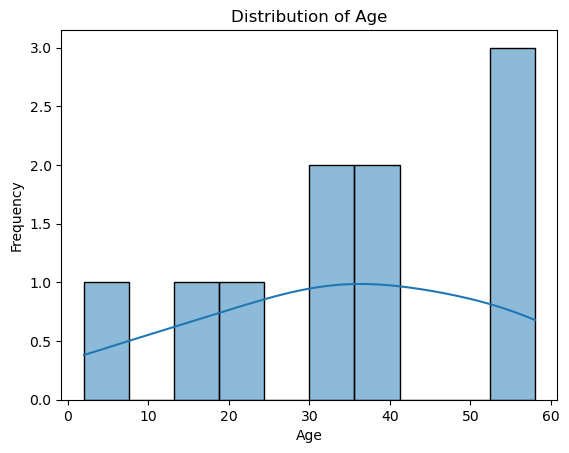

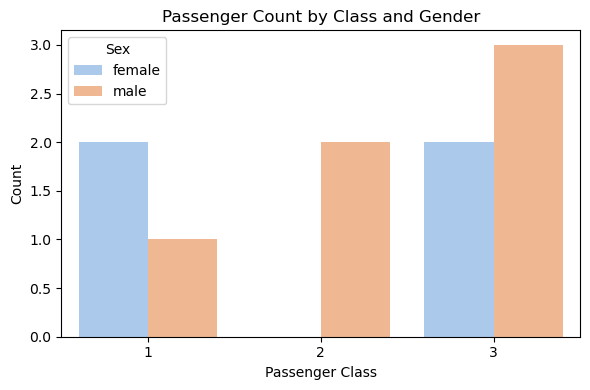

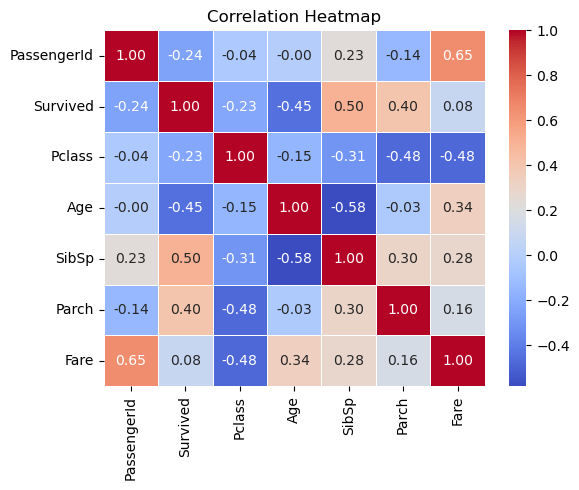

In [58]:
identify_trends_patterns(data)

### Distribution of Age Graph:
- The highest frequency is observed in the 50-60 age group.
- The frequency decreases as age decreases, with the lowest frequency in the 0-10 age group.

---
## Summary Insights from the data
___

## #Missing Data & Cleaning
- The **'Cabin'** column had ~70% missing values and was filled with 'Unknown'.
- No duplicate records were retained after cleaning.

## #Passenger Demographics
- The majority of passengers were from 3rd class, followed by 1st and 2nd. The passenger distribution by class and sex is as follows: 1st class has 2 females and 1 male, 2nd class has 2 males with no females, and 3rd class has 2 females and 3 males.
- Male passengers made up a larger portion than females overall.

## #Survival trends
- **Female Survival Rates:**
  - Females in 1st class had a 50% survival rate.
  - There's no data (NaN) available for females in 2nd class, suggesting either no females were in this category in the dataset or there were too few to provide a meaningful statistic.
  - No females survived in 3rd class.
- **Male Survival Rates:**
  - Males in 1st class had a 100% survival rate, which is surprising given the general narrative around survival rates favoring women and children.
  - Males in 2nd class had a 50% survival rate.
  - Males in 3rd class had a 66.67% survival rate, which seems unexpectedly high given the circumstances.

## #Age and Fare Distributions
- 1st-class passengers who embarked at C (Cherbourg) paid the highest average fare of `$39.83`, while those who embarked at S (Southampton) paid `$31.28`.
- 2nd-class passengers who embarked at Q (Queenstown) paid an average fare of `$29.12`, significantly more than those who embarked at S ($13.00).
- For 3rd-class passengers, the average fare was `$18.18` for those who embarked at S, with no data available for C and Q.

## #Correlation Insights
- **Younger passengers were more likely to survive**, as indicated by the moderate negative correlation between Survived and Age (-0.45).
- **Higher-class passengers paid more and had better survival rates**, as indicated by the negative correlations between Pclass and Fare (-0.48) and Survived and Pclass (-0.23).
- **Passengers with family members on board had better survival chances**, as shown by the positive correlations between Survived and SibSp (0.50) and Survived and Parch (0.40).
- **Fare and survival have a weak correlation (0.08)**, suggesting that fare may not have been a significant factor in determining survival.. 